In [1]:
# Исследование рынка игр
# Для планирования кампании на 2017 год для интернет-магазина компьютерных игры «Стримчик»
# необходимо провести анализ рынка игр. 
# Доступны данные за период с 1980 по 2016 годы о продажах игр, оценках пользователей и экспертов, 
# жанрах и платформах. 
# Вся информация собрана в таблицу games и содержит следующие столбцы: 
# Name — название игры 
# Platform — платформа 
# Year_of_Release — год выпуска 
# Genre — жанр игры 
# NA_sales — продажи в Северной Америке (миллионы долларов) 
# EU_sales — продажи в Европе (миллионы долларов) 
# JP_sales — продажи в Японии (миллионы долларов) 
# Other_sales — продажи в других странах (миллионы долларов) 
# Critic_Score — оценка критиков (от 0 до 100) 
# User_Score — оценка пользователей (от 0 до 10) 
# Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 
# Данные за 2016 год могут быть неполными.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [3]:
# Прочитаем файл games.csv и сохраним его в переменной games. Получим первые 10 строк таблицы 
# и посмотрим общую информацию, чтобы первично оценить данные.

In [4]:
games = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-chernova-3/lesson_6/games.csv')
pd.set_option('display.max_columns', 12)


In [5]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
# Рассмотрим полученную информацию подробнее.
# Всего в таблице 11 столбцов, в пяти из них тип данных - текстовый или смешанный тип, в шести - числа с плавающей точкой. 
# Таким образом, для изучения доступны пять категориальных и шесть количественных признаков. Представлена информация
# о 16715 играх, количество значений в столбцах различается. Это говорит о том, что в данных есть пропущенные значения. 
# Можно предположить, что данные в таких столбцах,# как название и жанр, случайно были пропущены при заполнении таблицы, 
# так как любая игра должна иметь название и любой игре можно предписать 
# определенный жанр. Достаточно большое количество пропусков есть в столбцах, содержащих информацию об оценках критиков, 
# пользователей и рейтинге. 
# Небольшая часть этих данных также могла быть пропущена при заполнении таблицы из-за человеческого фактора, 
# но большое количество пропусков наводит на мысль, что часть игр просто не обладает этими характеристиками.

In [8]:
# Подготовим данные. Приведем названия столбцов к нижнему регистру и преобразуем данные в нужные типы.

In [9]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [10]:
games = games.rename(columns = {'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales':'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales':'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating':'rating'})
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [11]:
games.isna().sum() 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [12]:
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce')

In [13]:
# Преобразуем данные об оценке пользователей в числовой тип, чтобы иметь возможность совершать с этими данными 
# математические действия. 
# Так как изначально у этого столбца тип object, это значит, в столбце есть нечисловые значения или пропуски. 
# Присвоим параметру errors значение coerce, чтобы заменить некорректные значения на NaN. 
# До и после операции количество NaN в столбце не изменилось, значит, некорректных значений не было.

In [14]:
games.isna().sum() 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [15]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [16]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

In [17]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [18]:
# Обработаем пропуски и дубликаты. Проверим их наличие.

In [19]:
games.duplicated().sum()

0

In [20]:
games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [21]:
# Пустые значения свидетельствуют о том, что для некоторых игр доступна не вся информация.
# Во-первых, в двух наблюдениях нет названия игр, еще в двух - жанра. Скорее всего, эти пропуски носят не системный характер 
# и связаны с человеческим фактором - при заполнении данных эти показатели могли пропустить. 
# Так как их доля незначительна и не представляется возможным заменить пропуски на данные, эти наблюдения можно удалить.

In [22]:
games.dropna(subset = ['name'], inplace = True)
games.dropna(subset = ['genre'], inplace = True)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [23]:
# Следущий столбец с пропусками - год релиза. Относительно общего числа наблюдений их немного, они носят не системный характер. 
# Частично эти пропуски можно заполнить, используя информацию из столбца с названием игры, так как во многих названиях есть
# указание года. 
# Также в некоторых случаях, если игра представлена на нескольких платформах, есть информация о годе релиза для какой-то 
# одной из платформ. 
# Соответсвенно, эту информацию можно использовать, чтобы заполнить пропуски для остальных платформ. 
# Это позволит получить данные более, чем о половине игр с пропущенным годом выхода. При необходимости оставшиеся данные 
# можно восстановить вручную, находя информацию о дате релиза игры в открытых источниках, 
# тк количество таких наблюдений сравнительно невелико.

In [24]:
for row in games[games['year_of_release'].isnull() == True].index:  
    games['year_of_release'][row] = games.loc[games['name'] == games['name'][row], 'year_of_release'].max()
games.isnull().sum()    

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [25]:
# Почти у половины наблюдений отсутствуют данные о рейтинге критиков и пользователей ( 51 % и 54% соответственно). 
# Большое количество пропусков указывает на то, что их появление не случайно и носит системный характер. В большинстве случаев, 
# скорее всего, для этих игр не проводилась оценка. Поэтому нельзя с точностью сказать, является ли отсутствие рейтинга
# ошибочным пропуском или этой информации не может быть в принципе. В момент анализа этих параметров можно будет изучить
# данные как есть и сравнить с ситуацией, когда пропуски заменены на среднее (так как здесь не может появиться 
# предельно больших чисел, сильно искажающих общую картину, и все варианты ограничены диапазоном от 0 до 100 и от 0 до 10, 
# нет необходимости использовать медиану, и пропуски можно заменить на среднее).

In [26]:
# В столбцах с рейтингом есть аббревиатуру 'tbd' - 'to be determined'. Это означает, что рейтинг еще не определен. 
# Можно отметить, что зачастую рейтинга нет у игр, для которых продажи есть только в японском сегменте рынка. 
# Возможно, что это игры для внутреннего рынка и, соответственно, для них рейтинг не выставляется, но предположение 
# следует проверить, если это возможно, у создателей сводной таблицы. 
# Также рейтинга может не быть у игр, созданных до его возникновения. 
# Пока же можно заменить пустые значения на NR - no rating, и рассматривать,
# помимо самих рейтингов, еще две категории - рейтинг не определен и нет рейтинга.

In [27]:
games['rating'] = games['rating'].fillna('NR')
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NR
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NR


In [28]:
games.isnull().sum()


name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

In [29]:
# Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [30]:
games['all_sales'] = games['na_sales']+games['eu_sales']+games['eu_sales']+games['eu_sales']+games['other_sales'] 
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,136.69
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR,40.59
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,57.25
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,51.35
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR,38.94
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NR,30.56
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,41.58
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,44.34
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,37.50
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NR,29.29


In [31]:
# Исследовательский анализ данных
# Посмотрим, сколько игр выпускалось в разные годы и оценим, важны ли данные за все периоды. Для этого группируем данные по году
# и вызовом метода nunique() подсчитаем количество уникальных игр для каждого года (так как многие игры указаны для нескольких платформ одновременно).

In [32]:
count_on_year = games.groupby('year_of_release')['name'].nunique()
count_on_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      40
1992      41
1993      59
1994     117
1995     215
1996     258
1997     282
1998     364
1999     326
2000     325
2001     428
2002     631
2003     546
2004     550
2005     657
2006     773
2007     884
2008    1039
2009    1001
2010     900
2011     779
2012     446
2013     335
2014     319
2015     362
2016     297
Name: name, dtype: int64

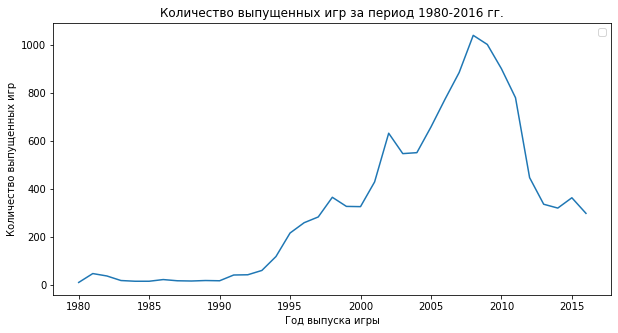

In [33]:
plt.figure(figsize=(10,5))
sns.lineplot(data=count_on_year)
plt.title('Количество выпущенных игр за период 1980-2016 гг.')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество выпущенных игр')
plt.legend('')

In [34]:
# Видно, что до 1994 года количество выпускаемых игр значительно ниже. В 1994 году появились новые жанры, образовались новые франшизы и компании, 
# а также Interactive Digital Software Association, которая учреждает возрастной рейтинг для видео игр Entertainment Software Rating Board (ESRB).
# Пик продаж игр пришелся на 2008-2009 год, потом началось снижение, что можно объяснить массовым распространением мобильных телефонов и планшетов 
# и популярностью мобильных игр. Согласно информации из сети, массовое развитие мобильного гейминга началось еще в 2009-2011 годах, 
# когда AppStore и PlayMarket начали активно заполнять такие игры, как: Angry Birds, Fruit Ninja и прочие.

In [35]:
# Посмотрим, как менялись продажи по платформам.

In [36]:
platform_sales = games.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False)
platform_sales

,all_sales
platform,
PS2,1795.15
PS3,1520.04
X360,1500.51
Wii,1362.60
PS,1018.26
DS,1008.33
PS4,580.36
PC,544.23
GBA,421.02


Text(0, 0.5, 'Количество продаж')

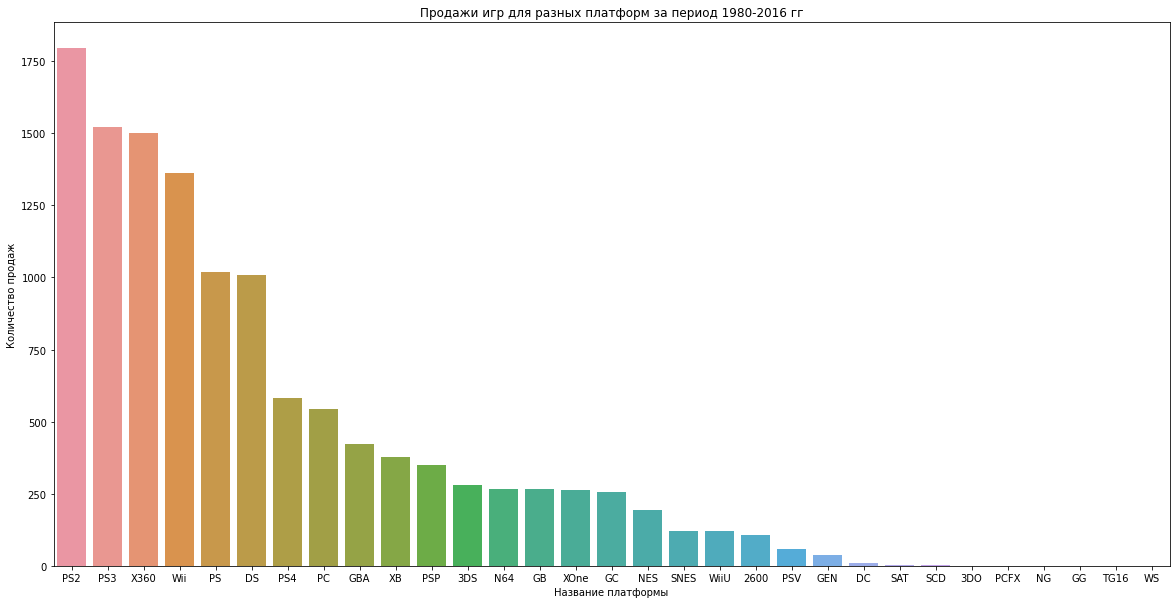

In [37]:
plt.figure(figsize=(20,10))
sns.barplot(x=platform_sales.index,y=platform_sales['all_sales'])
plt.title('Продажи игр для разных платформ за период 1980-2016 гг')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж')

In [38]:
# В числе первых шести приставок с количеством игр больше тысячи - игровые приставки линейки PlayStation компании Sony
# ( PlayStation, PlayStation 2 и PlayStation 3). Исторически большое количество хитовых игр сделало эту приставку очень популярной, 
# что позволило PlayStation удержать лидерство на рынке игровых консолей. Следующие по популярности - консоли от Nintendo DS и Wii,
# а также игровая приставка компании Microsoft Xbox 360. 

In [39]:
# Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 
# Возьмем консоли с продажами больше 1000. Это PS2, PS3, X360, Wii, PS, DS.

In [40]:
top_platforms = games.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False).head(6)
top_platforms

,all_sales
platform,
PS2,1795.15
PS3,1520.04
X360,1500.51
Wii,1362.60
PS,1018.26
DS,1008.33


In [41]:
def sale_on_year_for_platform(platform):
    all_sales_on_platform =games[(games['platform'] == platform)].pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return all_sales_on_platform 


In [42]:
sale_on_year_for_platform('PS2')


,all_sales
year_of_release,
2011,0.62
2010,9.68
2009,34.34
2008,63.43
2007,87.22
2006,130.19
2005,227.33
2004,304.66
2003,301.76


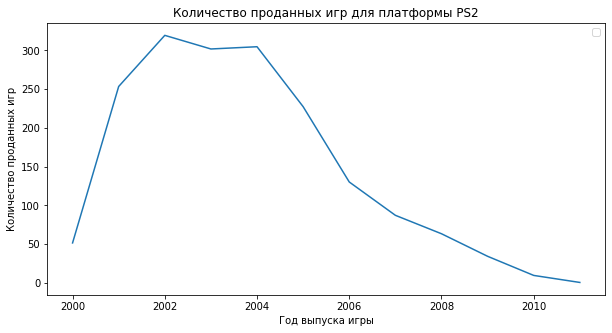

In [43]:
plt.figure(figsize=(10,5))
sns.lineplot(data=sale_on_year_for_platform('PS2'))
plt.title('Количество проданных игр для платформы PS2')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество проданных игр')
plt.legend('')

In [44]:
sale_on_year_for_platform('PS3')


,all_sales
year_of_release,
2016,4.82
2015,25.23
2014,77.99
2013,185.66
2012,175.26
2011,257.63
2010,234.18
2009,204.70
2008,190.43


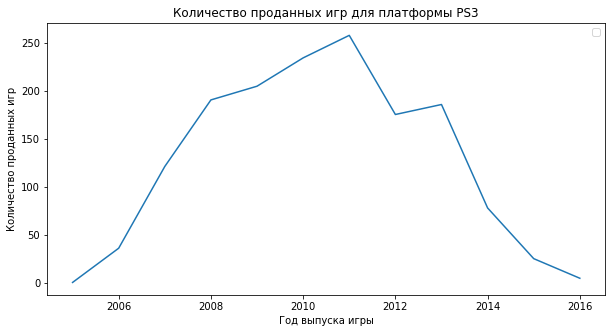

In [45]:
plt.figure(figsize=(10,5))
sns.lineplot(data=sale_on_year_for_platform('PS3'))
plt.title('Количество проданных игр для платформы PS3')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество проданных игр')
plt.legend('')

In [46]:
sale_on_year_for_platform('X360')


,all_sales
year_of_release,
2016,2.94
2015,18.96
2014,57.22
2013,142.21
2012,164.40
2011,229.40
2010,261.28
2009,185.90
2008,211.00


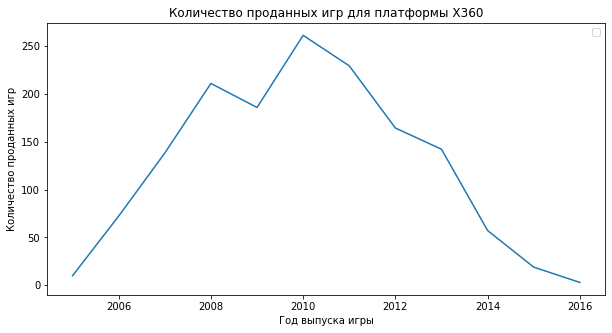

In [47]:
plt.figure(figsize=(10,5))
sns.lineplot(data=sale_on_year_for_platform('X360'))
plt.title('Количество проданных игр для платформы X360')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество проданных игр')
plt.legend('')

In [48]:
sale_on_year_for_platform('Wii')

,all_sales
year_of_release,
2016,0.40
2015,2.38
2014,7.47
2013,15.22
2012,32.42
2011,89.61
2010,192.51
2009,307.02
2008,260.42


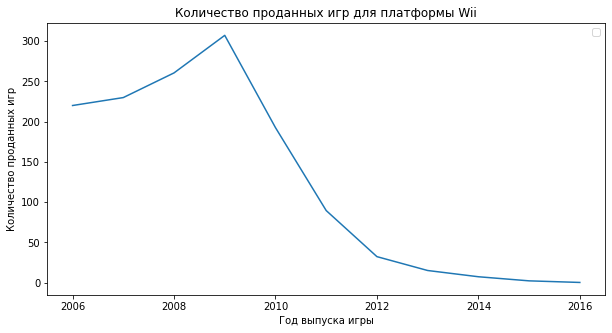

In [49]:
plt.figure(figsize=(10,5))
sns.lineplot(data=sale_on_year_for_platform('Wii'))
plt.title('Количество проданных игр для платформы Wii')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество проданных игр')
plt.legend('')

In [50]:
sale_on_year_for_platform('PS')


,all_sales
year_of_release,
2003,3.63
2002,8.81
2001,59.17
2000,142.87
1999,201.66
1998,238.49
1997,177.35
1996,128.72
1995,46.12


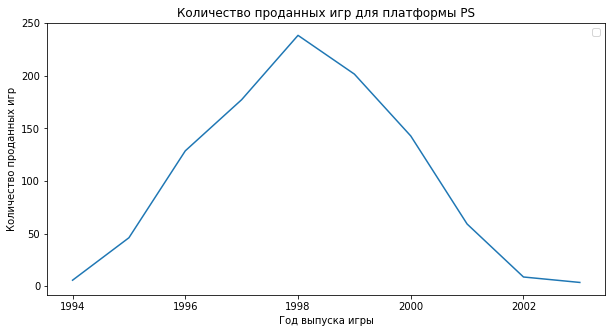

In [51]:
plt.figure(figsize=(10,5))
sns.lineplot(data=sale_on_year_for_platform('PS'))
plt.title('Количество проданных игр для платформы PS')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество проданных игр')
plt.legend('')

In [52]:
sale_on_year_for_platform('DS')


,all_sales
year_of_release,
2013,3.24
2012,13.81
2011,33.45
2010,103.17
2009,147.05
2008,185.83
2007,188.02
2006,127.39
2005,183.26


In [53]:
# Избавимся от 1985 года.

In [54]:
sale_on_year_for_platform_DS = games[(games['platform'] == 'DS') & (games['year_of_release'] > 2003)].pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
sale_on_year_for_platform_DS

,all_sales
year_of_release,
2013,3.24
2012,13.81
2011,33.45
2010,103.17
2009,147.05
2008,185.83
2007,188.02
2006,127.39
2005,183.26


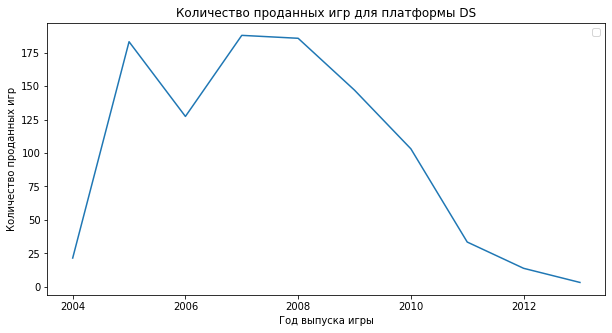

In [55]:
plt.figure(figsize=(10,5))
sns.lineplot(data=sale_on_year_for_platform_DS)
plt.title('Количество проданных игр для платформы DS')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество проданных игр')
plt.legend('')

In [56]:
# Так как три консоли - это приставки линейки PS разного поколения, можно наблюдать, как с появлением очередной модели спрос на предыдущие снижался. 
# Игры для PS продавались 10 лет с 1994 по 2003, максимальные продажи пришлись на промежуток с 1996-2000 с пиком в 1998 году, после 2000 резко упали, 
# так как появилась приставка Playstation2. Игры для PS2 продавались 11 лет с 2000 по 2011 с максимальными продажами в период 2001 по 2006, 
# затем на рынке появились игры для PS3 и продержались там 12 лет с 2005 по 2016, соответственно, продажи для PS2 пошли на спад. 
# Больше всего игр для PS3 было продано с 2008 по 2013 с пиком в 2010-2011. А в 2013 уже появилась приставка PS4, соответственно,
# можно ожидать популярность игр для нее в 2016-2018 годах. Игры для платформы Х360 развивались 12 лет, наибольший спрос на них пришелся 
# на 2008-2013 года с пиком в 2010-2011, игры для консоли Nintendo Wii продавались с 2006 по 2016 с максимум в промежутке от 2006 по 2010 и пиком в 2009.
# Карманная консоль Nintendo DS была разработана в 2004 (появление в таблице строки с 85 - какая-то ошибка) и игры для нее продавались до 2013, 
# популярность этих игр резко возросла почти сразу после выхода в 2005 и продержалась пять лет до 2009, больше всего продаж было сделано в 2007-2008 годы. 
# Для всех платформ наблюдается примерно одинаковое развитие - время существования определенной модели 10-12 лет 
# (в случае с PS - это естественная смена моделей на более современные версии), на пике популярности держится около 4 лет. Из популярных раньше платформ
# до 2016 продержались Wii, X360 и PS3, продажи для более ранних версий этих приставок сейчас на нуле.

In [57]:
# Рассчитаем продолжительность существования отобранных платформ.

In [58]:
print('Срок существования платформы PS2', sale_on_year_for_platform('PS2').shape[0])
print('Срок существования платформы PS3', sale_on_year_for_platform('PS3').shape[0])
print('Срок существования платформы X360', sale_on_year_for_platform('X360').shape[0])
print('Срок существования платформы Wii', sale_on_year_for_platform('Wii').shape[0])
print('Срок существования платформы PS', sale_on_year_for_platform('PS').shape[0])
print('Срок существования платформы DS', sale_on_year_for_platform('DS').shape[0])

Срок существования платформы PS2 12
Срок существования платформы PS3 12
Срок существования платформы X360 12
Срок существования платформы Wii 11
Срок существования платформы PS 10
Срок существования платформы DS 11


In [59]:
# Срок существования платформ примерно одинаковый, судя по графикам, рост и снижение продаж тоже происходит примерно одинаково. Отличаются продажи игр 
# для таких платформ, как Wii и DS. Продажи для Wii начались очень хорошо и быстро вышли на пик, но резко упали после 2009 года. В продажах игр для DS 
# в 2006 наблюдался небольшой провал. Успех на старте продаж у игр для Wii легко объясним - для охвата наибольшей аудитории на консоль была поставлена
# цена на порядок ниже, чем у Xbox и PS3. Таким образом приставка Wii была нацелена на казуальную аудиторию. Возможно, в этом же и причина такого резкого 
# спада продаж игр для нее - казуалы очень не постоянные игроки, а для геймеров, увлеченных компьютерными играми, игры для данной приставки могли 
# не понравиться из-за слабой графики. Также можно предположить, что спад продаж вызвал выход в 2012 консоли следующего поколения Wii U и появления игр 
# для нее. Для Ds провал в 2006, возможно, связан с появление в этом году PlayStation 3 и Nintendo Wii, что могло оттянуть внимание пользователей. 
# Несмотря на все различия, в анализе стоит учитывать все платформы, так как каких-то аномальных значений в продолжительности существования нет, 
# то есть выбросов, вызванных каким-то случайными ошибками нет. Можно предположить, что после 2016 года будет наблюдаться такая же картина, однако, 
# нельзя отрицать возможность выбросов естсетсвенного характера - например, могут быть введены санкции против компании, производящей игры, 
# и ей придется прекратить выпуск игр на определенный рынок, что сократит продолжительность. Но в этом случае выброс не будет являться результатом ошибки 
# и даст новое понимание рынка игр, поэтому его также нужно будет учитывать.

In [60]:
# Необходимо определить, данные за какой период нужно взять, чтобы исключить значимое искажение распределения по платформам в 2016 году. 
# Для всех платформ общей точкой вхождения является 2006 год (самая рання дата для Wii). Информацию для PS можно дальше не рассматривать, 
# так как продажи игр для нее закончились еще в 2003.

In [61]:
# Таким образом, в дальнейшем будем рассматривать данные для платформ PS2, PS3, X360, Wii, DS в промежутке от 2006 по 2016 годы.

In [62]:
top_platforms = games[ (games['platform'].isin(['PS2', 'PS3', 'X360', 'Wii', 'DS']) & (games['year_of_release'] >2005))]
top_platforms.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,136.69
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,57.25
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,51.35
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,41.58
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,44.34
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,37.50
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,35.16
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,31.36
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,36.25
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,38.25


In [63]:
# Так как к 2017 году индустрия компьютерных игр находится на спаде, информация о периоде расцвета исказит результаты анализа, сократим период
# до промежутка 2010-2016. Часть приставок, которые обозначили выше как наиболее популярные, уже не существуют к этому времени, поэтому не будем 
# первоначально ограничиваться списком PS2, PS3, X360, Wii, DS и проверим, какие приставки остались и какие из новых лидеров появились в последние пять лет.
# За последние пять лет в лидерах оставались PS3 и X360, появилась портативная приставка следующего поколения от Nintendo 3DS, поступившая в продажу 
# в 2011 году. Также появились игры для PC. Для дальнейшего анализа отфильтруем таблицу по пяти самым популярным платформам.

In [64]:
top_platforms = games[(games['platform'].isin(['PS3', 'X360', 'PS4', 'Wii', '3DS']) & (games['year_of_release'] >2009))]
top_platforms.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,31.36
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,38.25
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,26.49
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,23.08
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NR,25.99
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,21.87
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NR,18.63
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,24.60
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,22.09
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,24.30


In [65]:
# Нужно определить, какие платформы лидируют по продажам, растут или падают, и выбрать несколько потенциально прибыльных платформ. 
# Остановимся на последнем годе.

In [66]:
games_in_2016 = games[(games['year_of_release'] == 2016)]
best_in_2016 = games_in_2016.pivot_table(index=['platform'], values='all_sales', aggfunc='sum').reset_index().sort_values(by='all_sales', ascending=False)
best_in_2016

,platform,all_sales
3,PS4,127.07
8,XOne,45.40
1,PC,12.31
0,3DS,11.77
6,WiiU,6.89
2,PS3,4.82
7,X360,2.94
4,PSV,1.47
5,Wii,0.40


In [67]:
# Самыми популярными в 2016 году стали игры для PS4 и XOne. Однако, судя по уровню продаж игр для платформ в целом, данная отрасль не перспективна 
# из-за технического и морального устаревания консолей и приставок, и популярности мобильных игр.

Text(0, 0.5, 'Количество продаж')

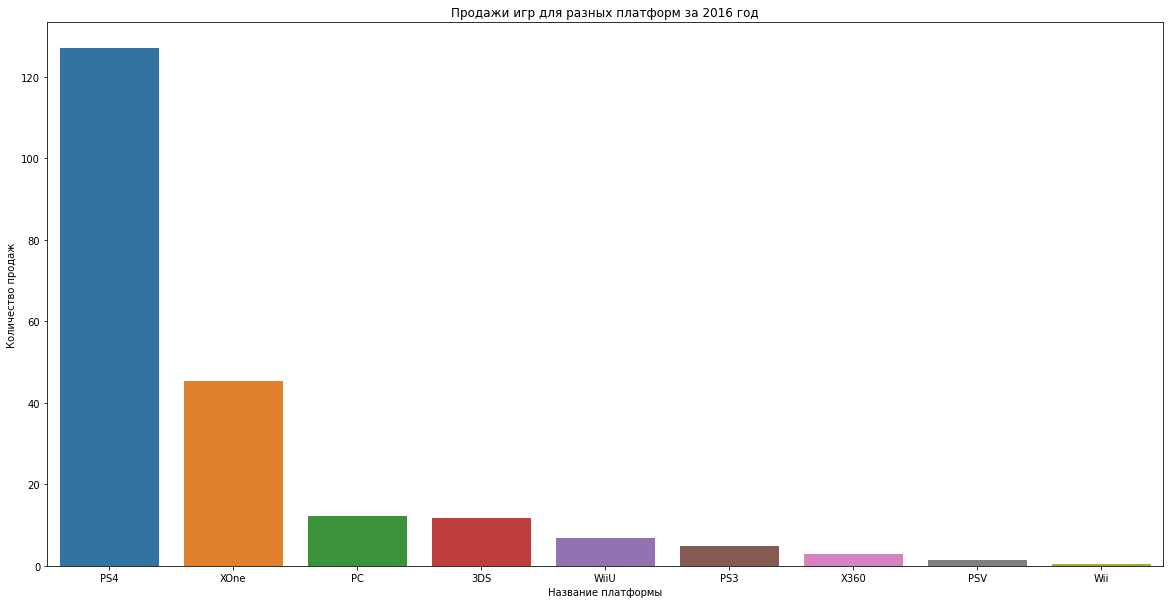

In [68]:
plt.figure(figsize=(20,10))
sns.barplot(x=best_in_2016['platform'],y=best_in_2016['all_sales'])
plt.title('Продажи игр для разных платформ за 2016 год')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж')

In [69]:
# Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Изучим, велика ли разница в продажах и в средних продажах 
# на разных платформах.

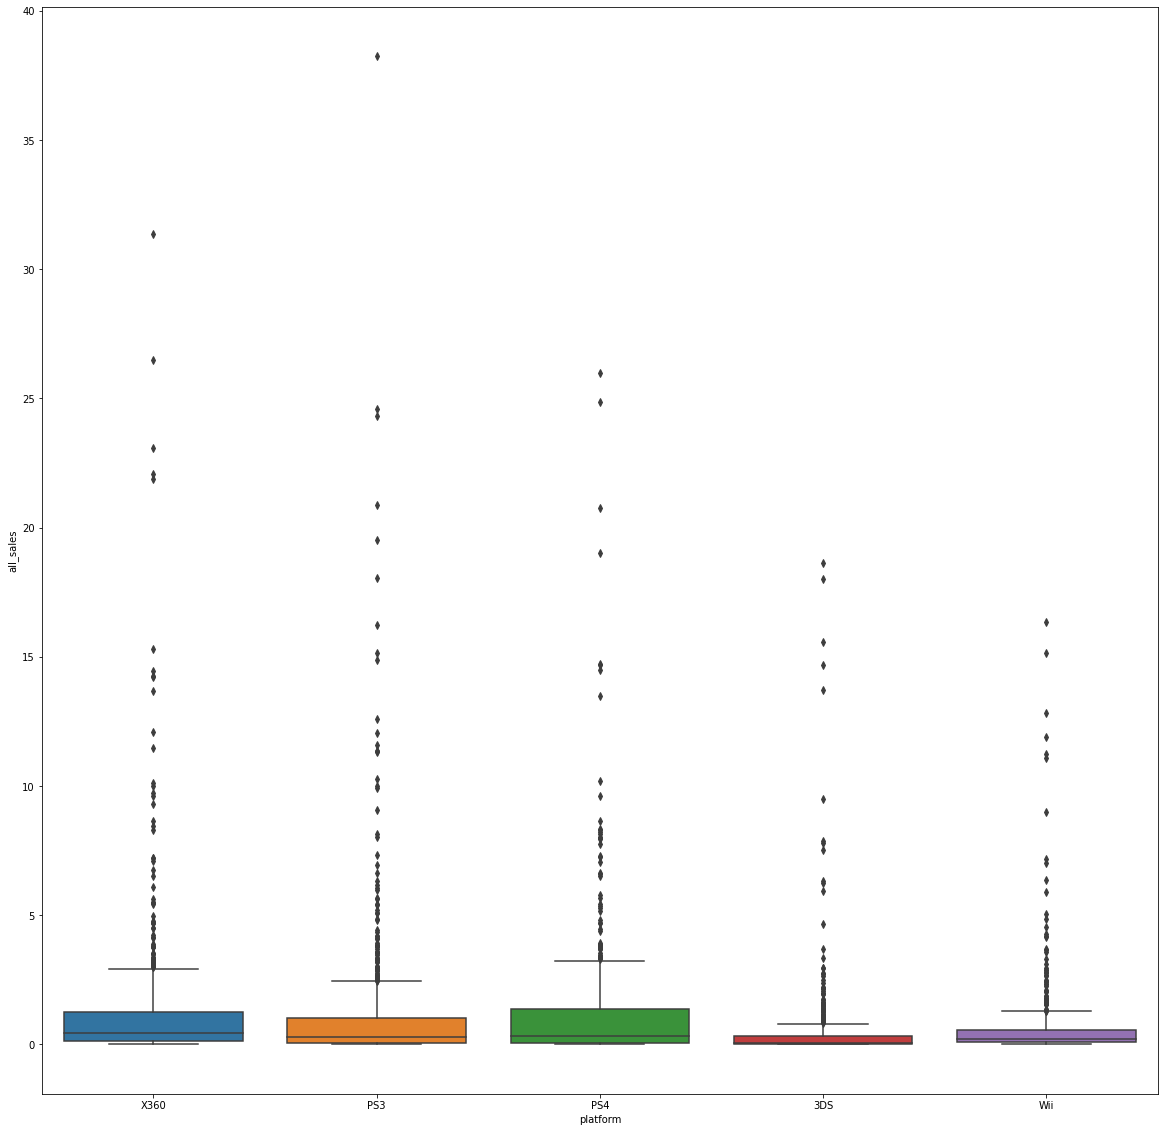

In [70]:
plt.figure(figsize=(20,20))
sns.boxplot(data=top_platforms, x='platform', y='all_sales')
plt.show()


In [71]:
# Избавимся от выбросов.

In [72]:
top_platforms = top_platforms[top_platforms['all_sales']<2]

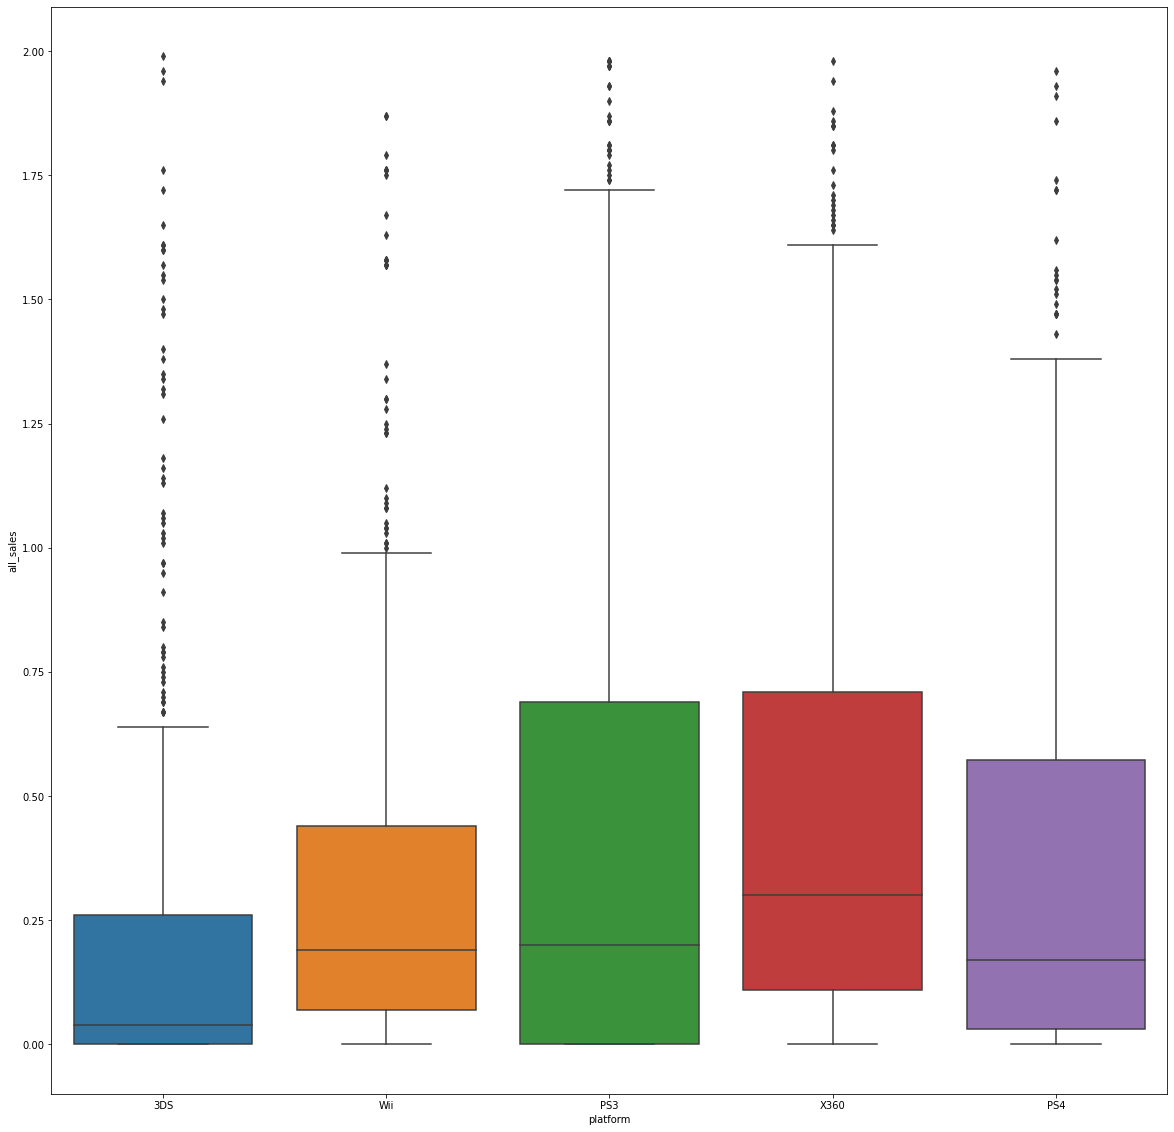

In [73]:
plt.figure(figsize=(20,20))
sns.boxplot(data=top_platforms, x='platform', y='all_sales')
plt.show()


In [74]:
# Продажи по всем платформам протекают по разному. Больше всего продаж у X360, затем у PS3, на третьем месте PS4. Медиана для Wii и PS3 примерно одинаковы,
# для другие же платформ они разительно отличаются.

In [75]:
top_platforms['all_sales'].describe()

count    2590.000000
mean        0.382124
std         0.470046
min         0.000000
25%         0.030000
50%         0.180000
75%         0.550000
max         1.990000
Name: all_sales, dtype: float64

In [76]:
# Судя по графику, наиболее гармонично выглядят продажи игр для X360 - половина всех игр для нее лучше продается, чем для других платформ. 
# Стоимость игр разных платформ примерно одинакова, сама же приставка X360 дешевле аналогичной приставки от Sony, что может быть одной из причин того, 
# что эти игры хорошо продаются - сама приставка более массово распространена. Для 3DS наоборот, почти у всех игр продажы низкие, те почти все игры 
# достаточно не популярны. Данные об играх для платфоры PS3 имеют самую высокую степень разброса среднеквадратичного отклонения и дисперсии, 
# следовательно, уровень продаж для разных игр этой платфоры сильно различается. Таким образом, стабильнее всего продаются игры для Х360, 
# возможно из-за того, что большинство игр одинаково популярны. Меньше всего продаж у игр для японсокй приставки 3DS, можно предположить, что большинство
# игр для нее остается на внутреннем японском рынке, что снижает общие продажи. Продажи игр для PS3 наиболее неоднородны - значит, среди игр много 
# как очень популярных, так и оставшихся незамеченными.

In [77]:
# Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Для этого построим диаграмму рассеяния
# и посчитаем корреляцию между отзывами и продажами. По общему числу продаж лидирует PS2.
# Для начала оценим влияние отзывов пользователей.

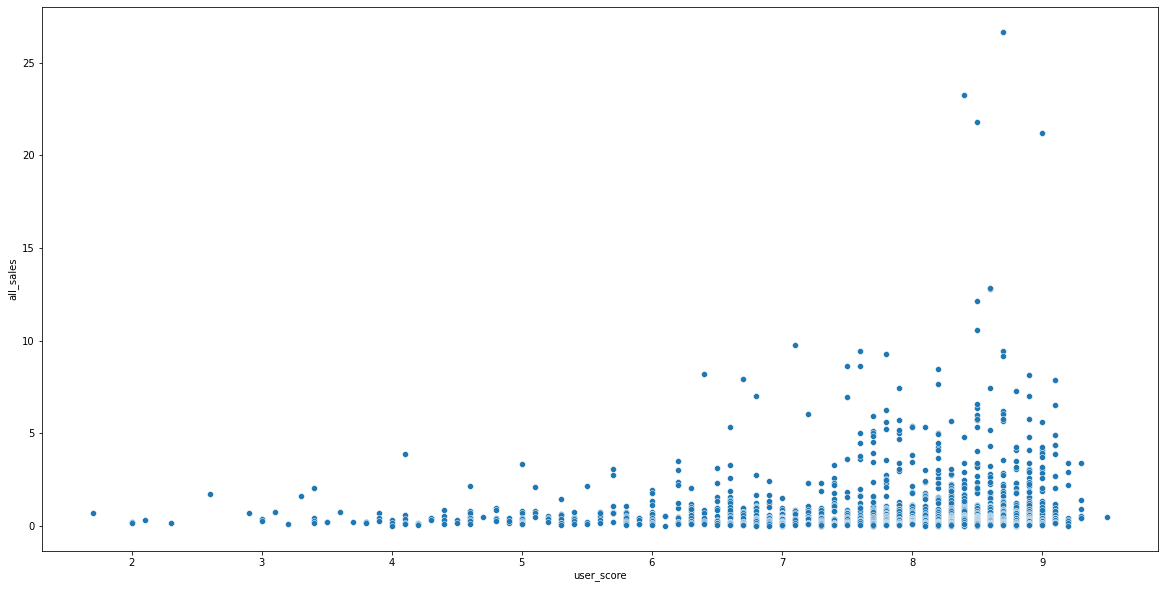

In [78]:
games_for_ps2 = games[games['platform']=='PS2']
plt.figure(figsize=(20,10))
sns.scatterplot(x='user_score', y='all_sales', data=games_for_ps2)


In [79]:
# Избавимся от выбросов.

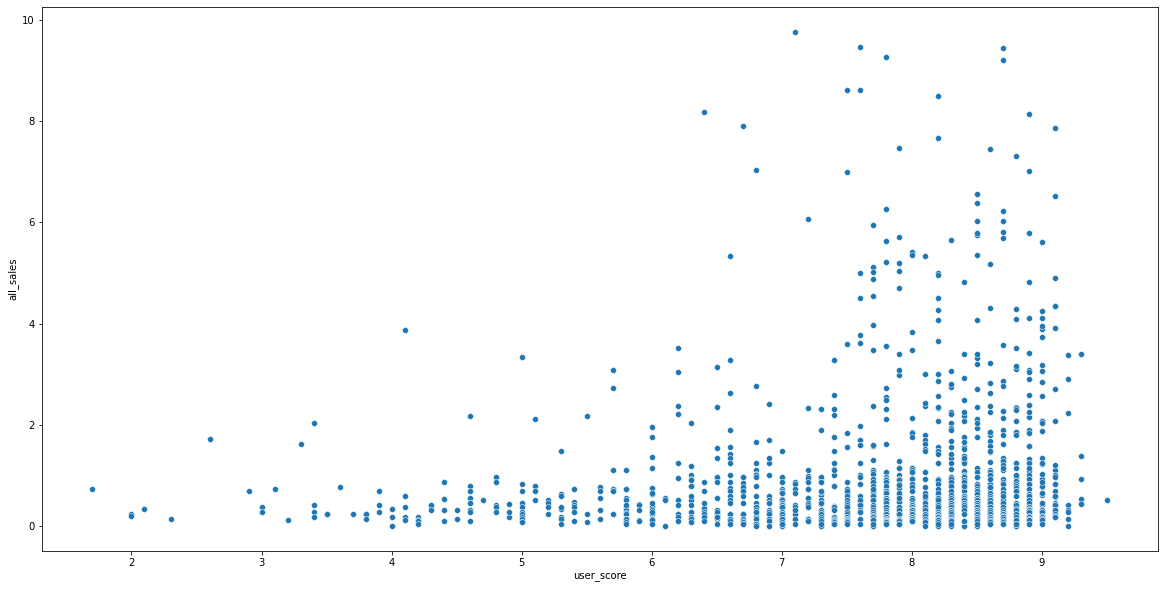

In [80]:
games_for_ps2 = games[(games['platform']=='PS2') & (games['all_sales']<10)]
plt.figure(figsize=(20,10))
sns.scatterplot(x='user_score', y='all_sales', data=games_for_ps2)

In [81]:
# Посчитаем корреляцию между отзывами и продажами

In [82]:
games_for_ps2['user_score'].corr(games_for_ps2['all_sales'])

0.157871203087475

In [83]:
# Корреляция слабая положительная, то есть отзывы пользователей очень незначительно повлияют на решение других пользователей о покупке.
# Теперь рассмотрим влияние отзывов критиков.

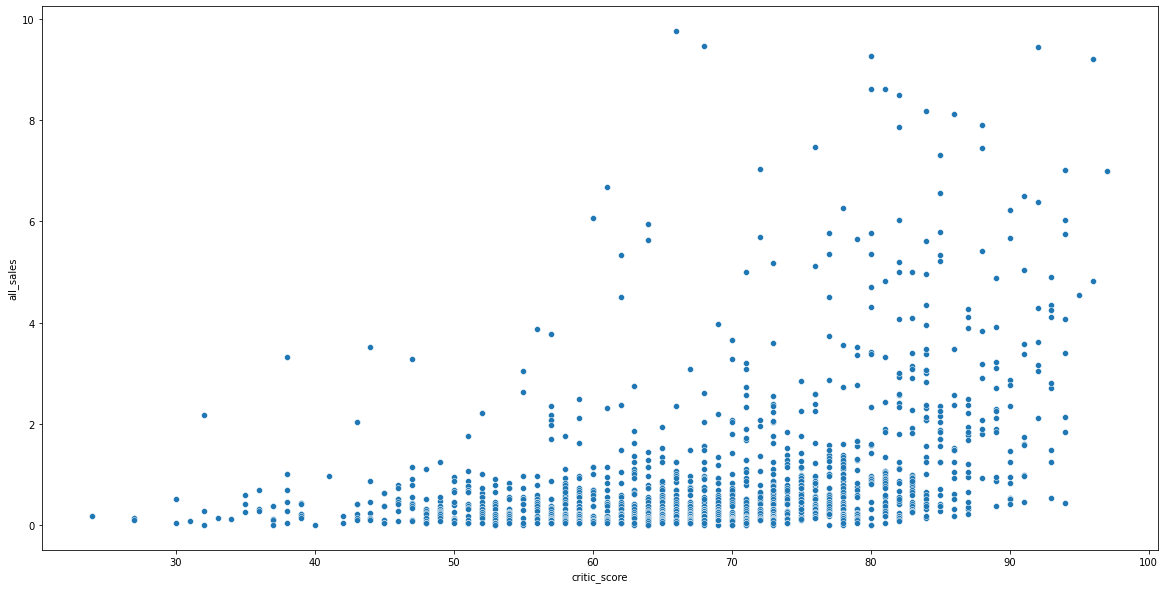

In [84]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='critic_score', y='all_sales', data=games_for_ps2)

In [85]:
games_for_ps2['critic_score'].corr(games_for_ps2['all_sales'])

0.38912167943844206

In [86]:
# Корреляция умеренная положительная, то есть отзывы критиков у покупателей вызывают больше доверия, чем отзывы других пользователей, 
# и больше влияют на решение совершить покупку. Соотнесем эти выводы с продажами игр на других платформах.

In [87]:
games_for_ps3 = games[(games['platform']=='PS3') & (games['all_sales']<10)]
print('Коэффициент корреляция между отзывами пользователей и продажами для PS2', games_for_ps3['user_score'].corr(games_for_ps3['all_sales']))
print('Коэффициент корреляция между отзывами критиков и продажами для PS2', games_for_ps3['critic_score'].corr(games_for_ps3['all_sales']))

Коэффициент корреляция между отзывами пользователей и продажами для PS2 0.2312590047935374
Коэффициент корреляция между отзывами критиков и продажами для PS2 0.49644940103584606


In [88]:
games_for_X360 = games[(games['platform']=='X360') & (games['all_sales']<10)]
print('Коэффициент корреляция между отзывами пользователей и продажами для X360', games_for_X360['user_score'].corr(games_for_X360['all_sales']))
print('Коэффициент корреляция между отзывами критиков и продажами для X360', games_for_X360['critic_score'].corr(games_for_X360['all_sales']))

Коэффициент корреляция между отзывами пользователей и продажами для X360 0.21554322258428008
Коэффициент корреляция между отзывами критиков и продажами для X360 0.48589058503387467


In [89]:
games_for_DS = games[(games['platform']=='DS') & (games['all_sales']<10)]
print('Коэффициент корреляция между отзывами пользователей и продажами для DS', games_for_DS['user_score'].corr(games_for_DS['all_sales']))
print('Коэффициент корреляция между отзывами критиков и продажами для DS', games_for_DS['critic_score'].corr(games_for_DS['all_sales']))

Коэффициент корреляция между отзывами пользователей и продажами для DS 0.09250398936330283
Коэффициент корреляция между отзывами критиков и продажами для DS 0.229318855021972


In [90]:
games_for_Wii = games[(games['platform']=='Wii') & (games['all_sales']<10)]
print('Коэффициент корреляция между отзывами пользователей и продажами для Wii', games_for_Wii['user_score'].corr(games_for_Wii['all_sales']))
print('Коэффициент корреляция между отзывами критиков и продажами для Wii', games_for_Wii['critic_score'].corr(games_for_Wii['all_sales']))

Коэффициент корреляция между отзывами пользователей и продажами для Wii 0.14653961448810432
Коэффициент корреляция между отзывами критиков и продажами для Wii 0.2954882722759498


In [91]:
# Для PS3 и X360 наблюдается такая же картина, как и для PS2 - слабое влияние отзывов пользователей и умеренная корреляция с отзывами критиков. 
# Для DS и Wii оба уровня корреляции оказались незначительными, причем влияние критиков также выше, чем влияние отзывов пользователей.
# Оценки критиков для потенциальных покупателей игры это самый простой способ сформировать приблизительное мнение о продукте, не играя самому. 
# Зачастую критики получают копию игры до начала официальных продаж, поэтому в первое время есть только эти отзывы, отзывы покупателей появляются, 
# естественно, позже. Также, в силу определенного профессионализма, критик может более адекватно оценить какие-то параметры и характеристики игры
# в плане графики, геймплея и тд. Нужно отметить, что при этом отзыв критика может быть заказан разработчиками игры, что снижает его объективность. 
# Пользовательский рейтинг более субъективен и непредсказуем. Но в общем, люди больше доверяют отзывам профессиональных критиков.

In [92]:
# Посмотрим на общее распределение игр по жанрам и определим самые прибыльные жанры.

In [93]:
count_genre = games.groupby('genre')['name'].nunique()
count_genre.sort_values(ascending=False)

genre
Action          1957
Sports          1379
Misc            1330
Role-Playing    1226
Adventure       1062
Shooter          825
Racing           772
Simulation       729
Fighting         613
Platform         588
Strategy         585
Puzzle           498
Name: name, dtype: int64

In [94]:
# В целом в базе данных больше всего игр таких жанров, как action, sports и misc, так что можно ожидать, что и по продажам они будут лидировать.

In [95]:
games_by_genre = games.pivot_table(index='genre', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False)
games_by_genre = games_by_genre.reset_index().rename_axis(None, axis=1)
games_by_genre 

,genre,all_sales
0,Action,2621.00
1,Sports,1949.31
2,Shooter,1648.37
3,Racing,1144.98
4,Misc,1119.88
5,Platform,1097.64
6,Role-Playing,956.57
7,Fighting,560.71
8,Simulation,553.21
9,Adventure,312.37


In [96]:
# Самый популярный жанр - action, затем идут sport и shooter. Racing, misc, platform имеют примерно одинаковую популярность, а затем интерес пользователей
# к играм остальных жанров резко падает. Самые низкие продажи у игр жанра strategy. При том, что action, sports и misc самые популярные жанры 
# и у разработчиков, игр в жанре shooter создано почти в полтора раза меньше, но продажи почти такие же, как у sports.

In [97]:
# Составим портрет пользователя каждого региона
# Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5) и самые популярные жанры (топ-5). 
# Оценим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [98]:
# Для региона NA.

In [99]:
NA_sales = games.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
NA_sales.head(5)

,na_sales
platform,
X360,602.47
PS2,583.84
Wii,496.90
PS3,393.49
DS,382.40


Text(0, 0.5, 'Количество продаж')

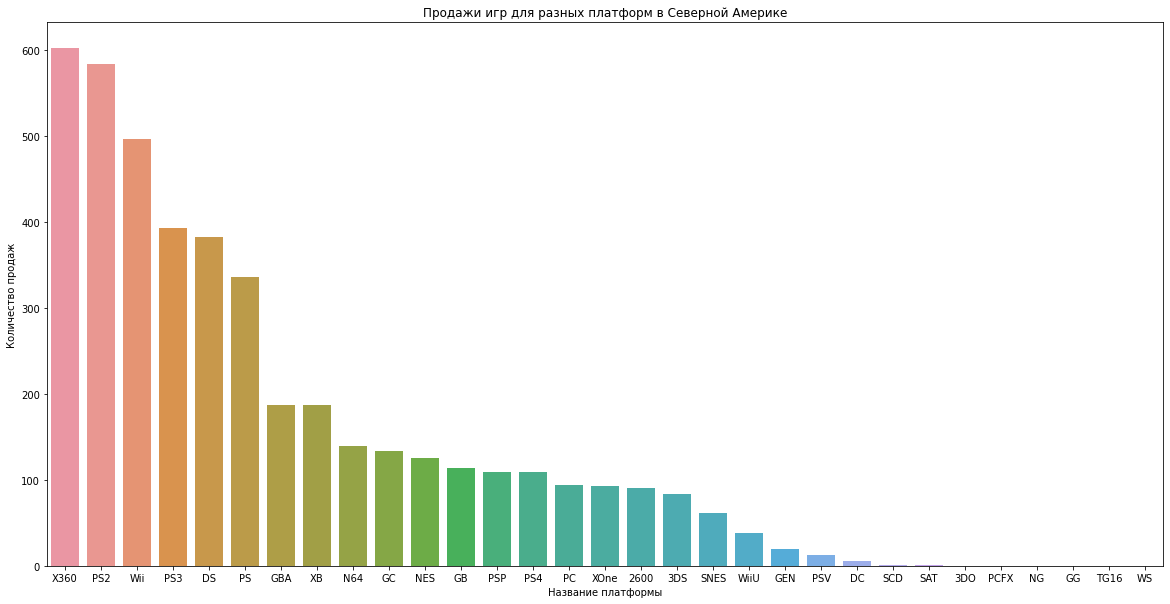

In [100]:
plt.figure(figsize=(20,10))
sns.barplot(x=NA_sales.index,y=NA_sales['na_sales'])
plt.title('Продажи игр для разных платформ в Северной Америке')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж')

In [101]:
NA_genre = games.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
NA_genre.head(5)

,na_sales
genre,
Action,879.01
Sports,684.43
Shooter,592.24
Platform,445.50
Misc,407.27


Text(0, 0.5, 'Количество продаж')

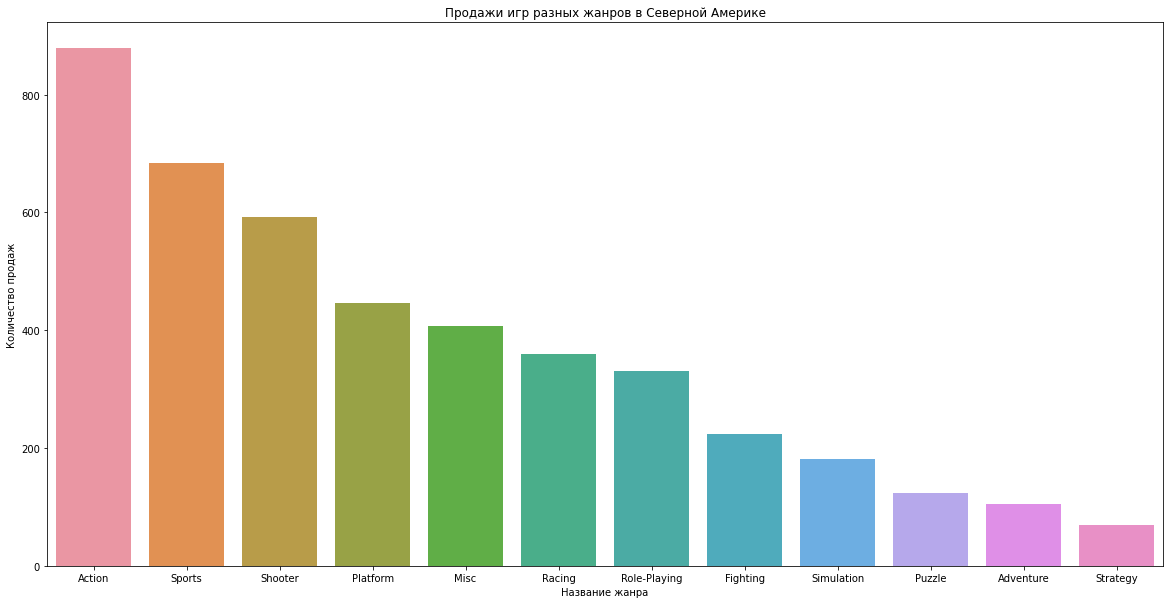

In [102]:
plt.figure(figsize=(20,10))
sns.barplot(x=NA_genre.index,y=NA_genre['na_sales'])
plt.title('Продажи игр разных жанров в Северной Америке')
plt.xlabel('Название жанра')
plt.ylabel('Количество продаж')

In [103]:
NA_rating = games.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
NA_rating.head(5)

,na_sales
rating,
E,1292.99
NR,1240.68
T,759.75
M,748.48
E10+,353.32


Text(0, 0.5, 'Количество продаж')

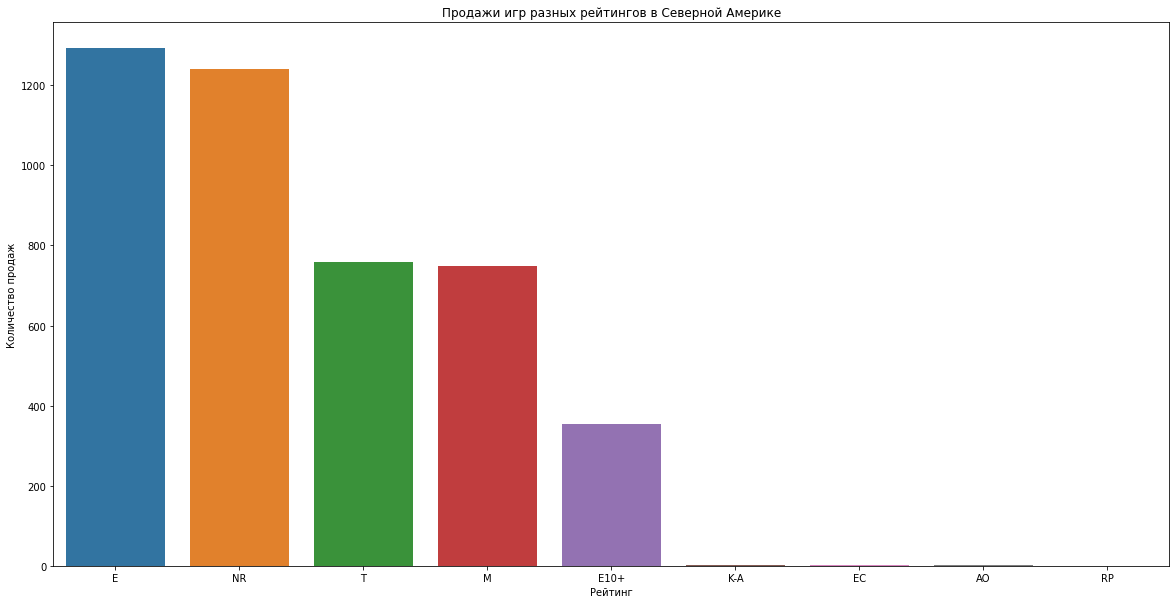

In [104]:
plt.figure(figsize=(20,10))
sns.barplot(x=NA_rating.index,y=NA_rating['na_sales'])
plt.title('Продажи игр разных рейтингов в Северной Америке')
plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж')

In [105]:
# Для региона Северной Америки наблюдается примерно такая же картина, как и для общих продаж - самые популярные игры для таких платформ, 
# как X360, PS2, Wii, PS3 и DS. Самые популярные жанры - action, sports, shooter, platform, misc. Лучше всего продавались игры с рейтингом Е 
# (Everyone, для всех), а также с рейтингом T (Teen, Подросткам 13—19) и M(Mature, от 17 лет).

In [106]:
# Для региона EU.

In [107]:
EU_sales = games.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
EU_sales.head(5)

,eu_sales
platform,
PS2,339.29
PS3,330.29
X360,270.76
Wii,262.21
PS,213.61


Text(0, 0.5, 'Количество продаж')

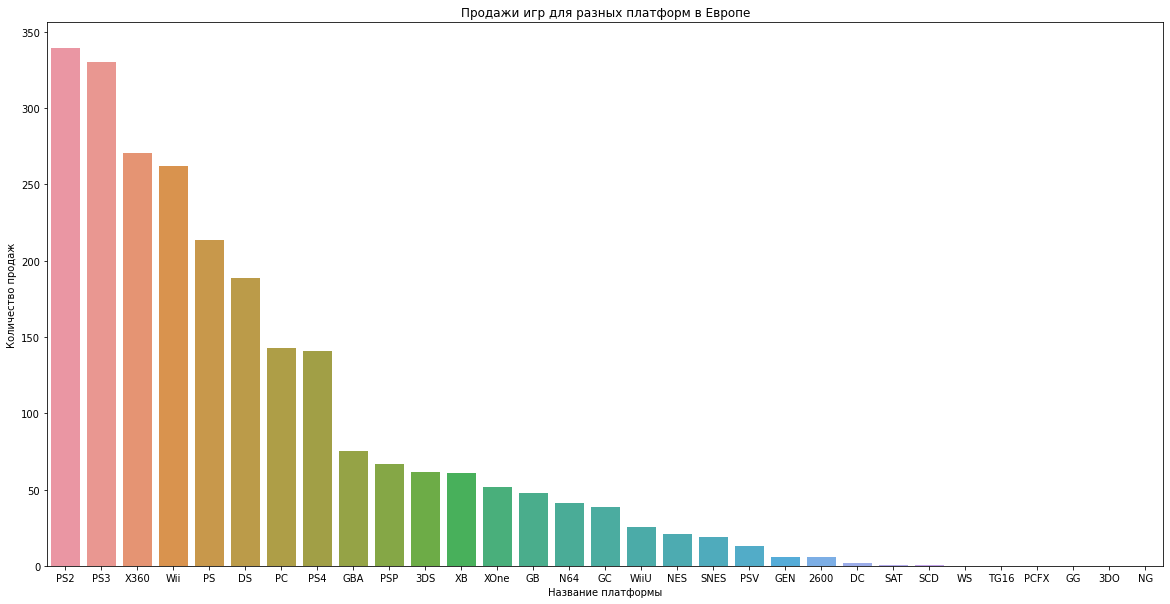

In [108]:
plt.figure(figsize=(20,10))
sns.barplot(x=EU_sales.index,y=EU_sales['eu_sales'])
plt.title('Продажи игр для разных платформ в Европе')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж')

In [109]:
EU_genre = games.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
EU_genre.head(5)

,eu_sales
genre,
Action,519.13
Sports,376.79
Shooter,317.34
Racing,236.51
Misc,212.74


Text(0, 0.5, 'Количество продаж')

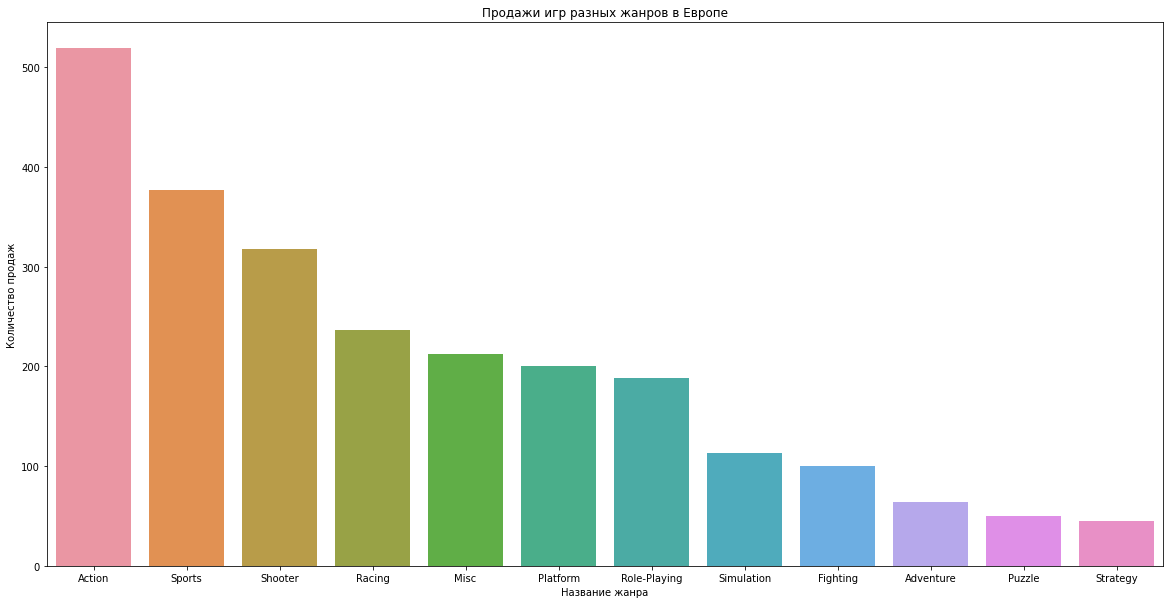

In [110]:
plt.figure(figsize=(20,10))
sns.barplot(x=EU_genre.index,y=EU_genre['eu_sales'])
plt.title('Продажи игр разных жанров в Европе')
plt.xlabel('Название жанра')
plt.ylabel('Количество продаж')

In [111]:
EU_rating = games.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
EU_rating.head(5)

,eu_sales
rating,
E,710.25
NR,613.30
M,483.97
T,427.03
E10+,188.52


Text(0, 0.5, 'Количество продаж')

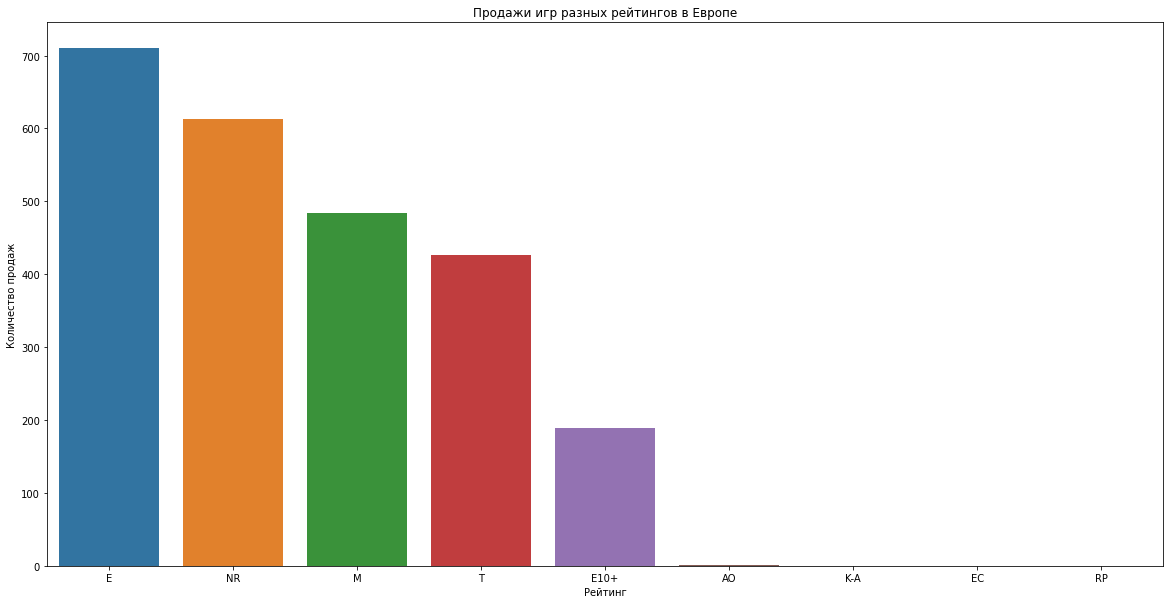

In [112]:
plt.figure(figsize=(20,10))
sns.barplot(x=EU_rating.index,y=EU_rating['eu_sales'])
plt.title('Продажи игр разных рейтингов в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж')

In [113]:
# Европейский сегмент игр имеет следущие особенности: cамые популярные платформы это PS2, PS3, X360, Wii и PS. Среди популярных жанров выделяются почти 
# все те же, что и для Серевной Америки. Самые популярные жанры - action, sports, shooter, racing, misc. Наиболее востребованы игры рейтинга Е 
# (Everyone, для всех), M(Mature, от 17 лет), а также с рейтингом T (Teen, Подросткам 13—19). Также, как и для Северной Америки, игр рейтинга E 
# почти в два раза больше, а игр рейтинга M и Т примерно поровну. Что естественно, так как в игра для всех, помимо детей младшего возраста и старше 10 лет,
# могут играть подростки 13-19 лет и старше 17.

In [114]:
# Для региона JP.

In [115]:
JP_sales = games.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
JP_sales.head(5)

,jp_sales
platform,
DS,175.57
PS,139.82
PS2,139.20
SNES,116.55
3DS,100.67


Text(0, 0.5, 'Количество продаж')

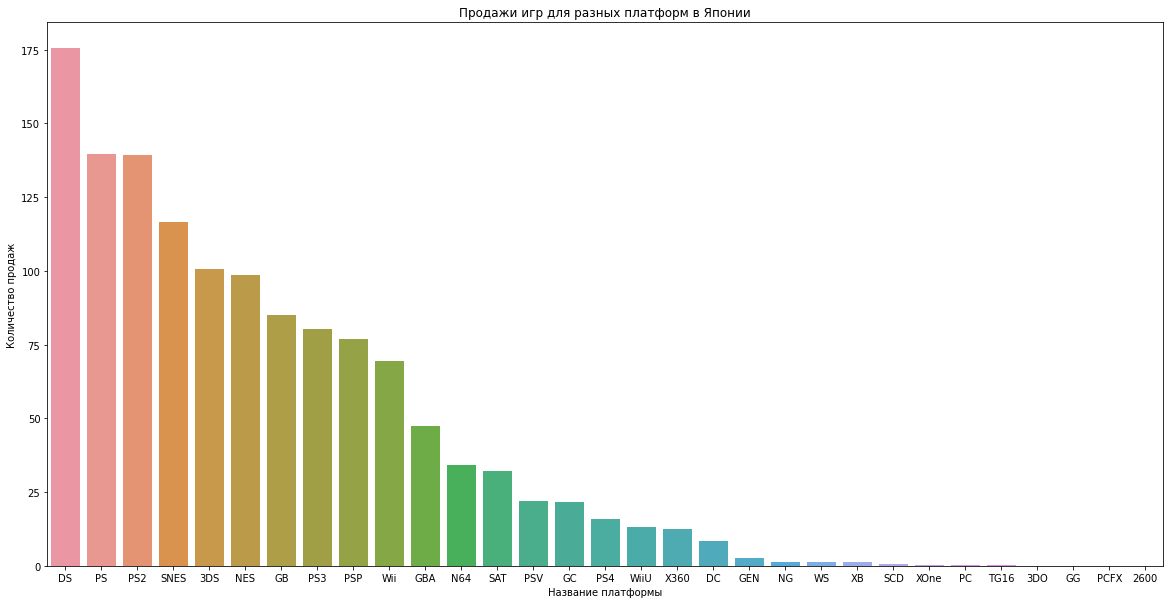

In [116]:
plt.figure(figsize=(20,10))
sns.barplot(x=JP_sales.index,y=JP_sales['jp_sales'])
plt.title('Продажи игр для разных платформ в Японии')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж')

In [117]:
JP_genre = games.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
JP_genre.head(5)

,jp_sales
genre,
Role-Playing,355.41
Action,161.43
Sports,135.54
Platform,130.83
Misc,108.11


Text(0, 0.5, 'Количество продаж')

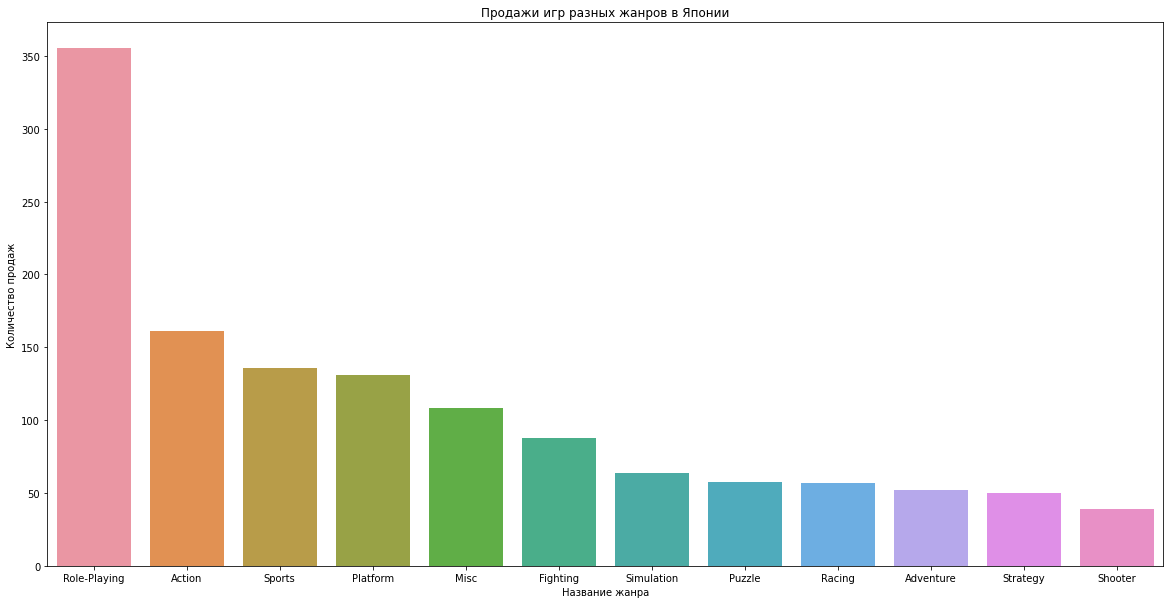

In [118]:
plt.figure(figsize=(20,10))
sns.barplot(x=JP_genre.index,y=JP_genre['jp_sales'])
plt.title('Продажи игр разных жанров в Японии')
plt.xlabel('Название жанра')
plt.ylabel('Количество продаж')

In [119]:
JP_rating = games.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
JP_rating.head(5)

,jp_sales
rating,
NR,841.93
E,198.11
T,151.40
M,64.24
E10+,40.20


Text(0, 0.5, 'Количество продаж')

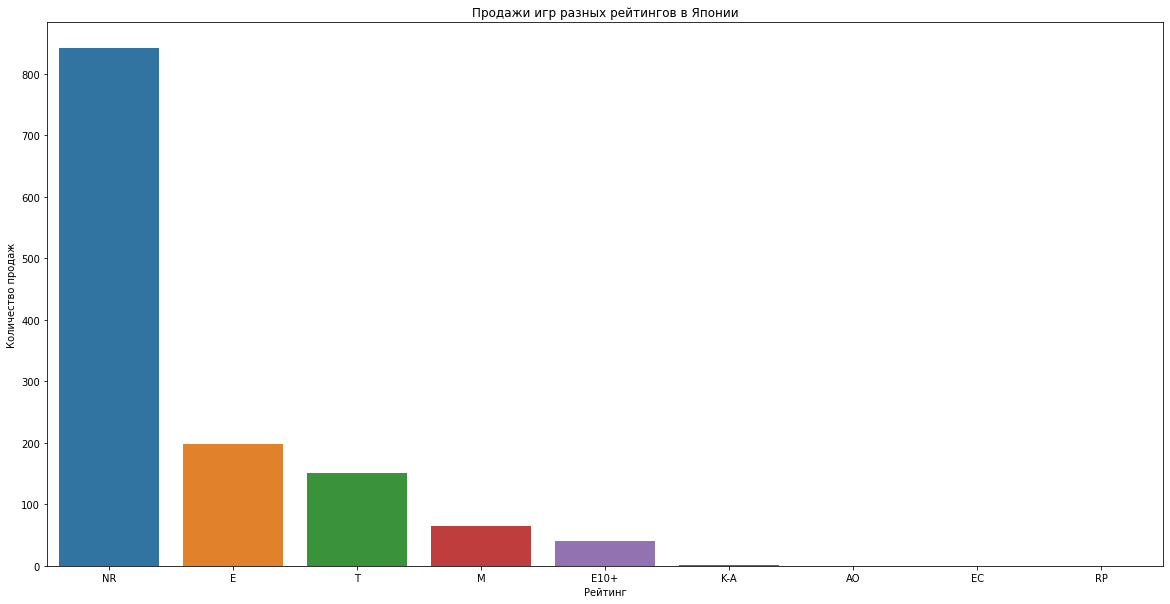

In [120]:
plt.figure(figsize=(20,10))
sns.barplot(x=JP_rating.index,y=JP_rating['jp_sales'])
plt.title('Продажи игр разных рейтингов в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж')

In [121]:
# В таблице представлена информация о рейтинге ESRB - Entertainment Software Rating Board. Возрастными рейтингами для консольных игр в Японии занимается
# CERO – некоммерческая организация, основанная в июле 2002-го. До 2006 года ее система состояла из четырех категорий – А («для всех возрастов»), 
# B («старше 12»), С («старше 15») и Z («от 18 и выше»). Скорее всего, рейтинг ESRB есть только у тех игр, которые выпускались Японией для внешнего рынка,
# остальные игры оцениваются по CERO.

In [122]:
# Для Японии предпочтения пользователей отличаются от предпочтений в Америке и Европе. Самые популярные игровые платформы - DS, PS, PS2, SNES, 3DS. 
# Здесь заметны региональные особенности. SNES - приставка от японской компании Nintendo, которая в свое время была лидером продаж в Японии. 
# 3DS - портативная игровая система производства того же Nintendo. Топ 5 жанров - это role-playing, action, sports, platform, misc. Среди популярных жанров 
# впервые появился жанр role-playing. Стоит отметить, что даже существует отдельное понятие японская ролевая игра, поджанр, выделяемый среди компьютерных 
# ролевых игр. Лучше всего продавались игры с рейтингом Е (Everyone, для всех), T (Teen, Подросткам 13—19) и M(Mature, от 17 лет). Причем для Японии, 
# в отличие от других регионов, количество игр для тинейджеров ближе к количеству игр для всех, а количество для более страшей возрастной категории
# значительно ниже.
# Игры, созданные в Японии, как правило отличаются от западных игр. И дело не только в культурных особенностях их создателей, но и в самом подходе 
# к разработке. Японские игры зачастую называют безумными из-за использования непривычных для западного геймера нарративных и дизайнерских приёмов. 
# Это происходит от того, что, например, создатели игр росли под влиянием японской анимации и манги, что сделало их видение особенным 
# (это также справедливо и для пользователей игр).

In [123]:
# В целом, влияние рейтинга на продажи в разных регионах примерно одинаковое. Можно предположить, что средний пользователь игр в Японии младше, 
# чем пользователь в Европе или Северной Америке. Также в топе игр для Северной Америке и Японии есть заметная группа игр без рейтинга, 
# в то время как в выборке по Европе такой группы не появилось.

In [124]:
# Исследование статистических показателей
# Оценим, как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах. Посчитаем среднее количество, дисперсию и стандартное отклонение. 
# Остановимся на пятерке самых популярных - action, sport, shooter, Racing и misc.
# Рассмотрим пользовательский рейтинг.

In [125]:
top_5_genre = ['Action', 'Sports', 'Shooter', 'Racing', 'Misc']
for genre in top_5_genre:
    print('Среднее количество',genre,':',  games[games['genre']==genre]['user_score'].mean())
    print('Дисперсия', genre,':', np.var(games[games['genre']==genre]['user_score']))
    print('Стандартное отклонение', genre,':', np.std(games[games['genre']==genre]['user_score']))
    print('\n')

Среднее количество Action : 7.054043715846995
Дисперсия Action : 2.0306366538266296
Стандартное отклонение Action : 1.4250040890561084


Среднее количество Sports : 6.96119673617407
Дисперсия Sports : 2.5941606711770175
Стандартное отклонение Sports : 1.6106398328543279


Среднее количество Shooter : 7.041883116883118
Дисперсия Shooter : 2.3020877958621466
Стандартное отклонение Shooter : 1.5172632585883528


Среднее количество Racing : 7.036193447737911
Дисперсия Racing : 2.38795680501167
Стандартное отклонение Racing : 1.5453015255967588


Среднее количество Misc : 6.819362186788155
Дисперсия Misc : 2.3883950373856506
Стандартное отклонение Misc : 1.5454433141935846




In [126]:
user_score_for_genre =pd.DataFrame({'genre':['Action', 'Sports', 'Shooter', 'Racing', 'Misc'],
        'Среднее': [7.0540, 6.9611, 7.0418, 7.0361, 6.8193],
        'Дисперсия': [2.0306, 2.5941, 2.3020, 2.3879, 2.3883],
        'Стандартное отклонение': [1.4250, 1.6106, 1.5172, 1.5453, 1.5454]})              
user_score_for_genre

,genre,Среднее,Дисперсия,Стандартное отклонение
0,Action,7.0540,2.0306,1.4250
1,Sports,6.9611,2.5941,1.6106
2,Shooter,7.0418,2.3020,1.5172
3,Racing,7.0361,2.3879,1.5453
4,Misc,6.8193,2.3883,1.5454


In [127]:
# Cтатистические показатели для всех жанров в целом похожи. В среднем, пользователи оценивают игры примерно одинаково, выделяются игры жанра misc 
# с наименьшим пользовательским рейтингом. Игры жанра action имеют наименьшее стандартное отклонение, значит, оценки пользователей ближе к среднему 
# показателю, чем для других жанров. Максимальные дисперсия и стандартное отклонение у жанра sports, что свидетельствует о том, что оценки этих игр
# наиболее неоднородны.

In [128]:
# Построим гистограммы, чтобы оценить, как изменяется пользовательский рейтинг в различных жанра.

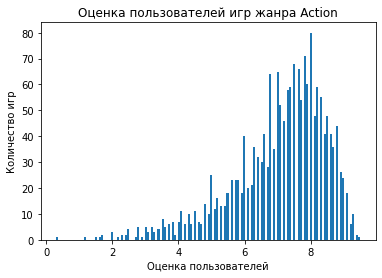

In [129]:
action_with_score = games[(games['genre']=='Action')]
plt.hist(action_with_score['user_score'], bins=150)
plt.title('Оценка пользователей игр жанра Action')
plt.ylabel('Количество игр')
plt.xlabel('Оценка пользователей')
plt.show()


In [130]:
#проверим, адекватно ли отобразились данные
print(action_with_score['user_score'].value_counts()) 

8.0    80
7.8    71
7.5    68
7.6    66
7.0    65
       ..
1.5     1
0.3     1
2.2     1
1.2     1
2.9     1
Name: user_score, Length: 79, dtype: int64


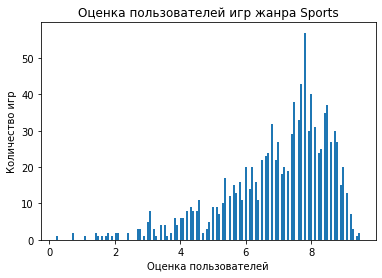

In [131]:
sports_with_score = games[(games['genre']=='Sports')]
plt.hist(sports_with_score['user_score'], bins=150)
plt.title('Оценка пользователей игр жанра Sports')
plt.ylabel('Количество игр')
plt.xlabel('Оценка пользователей')
plt.show()


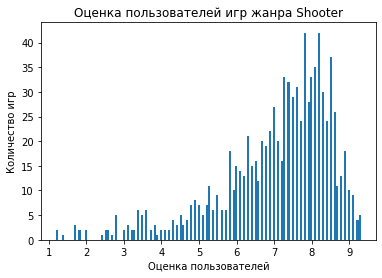

In [132]:
shooter_with_score = games[(games['genre']=='Shooter')]
plt.hist(shooter_with_score['user_score'], bins=150)
plt.title('Оценка пользователей игр жанра Shooter')
plt.ylabel('Количество игр')
plt.xlabel('Оценка пользователей')
plt.show()

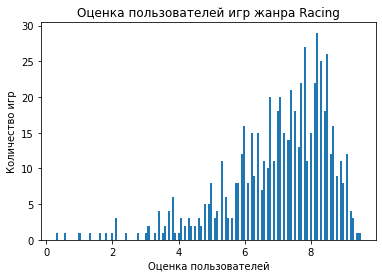

In [133]:
racing_with_score = games[(games['genre']=='Racing')]
plt.hist(racing_with_score['user_score'], bins=150)
plt.title('Оценка пользователей игр жанра Racing')
plt.ylabel('Количество игр')
plt.xlabel('Оценка пользователей')
plt.show()

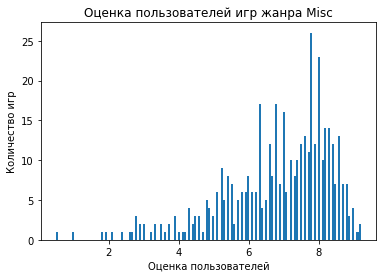

In [134]:
misc_with_score = games[(games['genre']=='Misc')]
plt.hist(misc_with_score['user_score'], bins=150)
plt.title('Оценка пользователей игр жанра Misc')
plt.ylabel('Количество игр')
plt.xlabel('Оценка пользователей')
plt.show()

In [135]:
# Рассмотрим рейтинг критиков.

In [136]:
for genre in top_5_genre:
    print('Среднее количество',genre,':',  games[games['genre']==genre]['critic_score'].mean())
    print('Дисперсия', genre,':', np.var(games[games['genre']==genre]['critic_score']))
    print('Стандартное отклонение', genre,':', np.std(games[games['genre']==genre]['critic_score']))
    print('\n')

Среднее количество Action : 66.62910052910053
Дисперсия Action : 201.72857114862404
Стандартное отклонение Action : 14.203118360016015


Среднее количество Sports : 71.96817420435511
Дисперсия Sports : 192.44957338338818
Стандартное отклонение Sports : 13.872619557365082


Среднее количество Shooter : 70.18114406779661
Дисперсия Shooter : 211.55299191144783
Стандартное отклонение Shooter : 14.544861357587697


Среднее количество Racing : 67.96361185983828
Дисперсия Racing : 202.738568086544
Стандартное отклонение Racing : 14.238629431463691


Среднее количество Misc : 66.61950286806884
Дисперсия Misc : 199.9144953551543
Стандартное отклонение Misc : 14.139112254846635




In [137]:
critic_score_for_genre =pd.DataFrame({'genre':['Action', 'Sports', 'Shooter', 'Racing', 'Misc'],
        'Среднее': [66.6291, 71.9681, 70.1811, 67.9636, 66.6195],
        'Дисперсия': [201.7285, 192.4495, 211.5529,  202.73856, 199.9144],
        'Стандартное отклонение': [14.2031, 13.8726, 14.5448, 14.2386, 14.1391]})              
critic_score_for_genre


,genre,Среднее,Дисперсия,Стандартное отклонение
0,Action,66.6291,201.72850,14.2031
1,Sports,71.9681,192.44950,13.8726
2,Shooter,70.1811,211.55290,14.5448
3,Racing,67.9636,202.73856,14.2386
4,Misc,66.6195,199.91440,14.1391


In [138]:
# Построим гистограммы, чтобы оценить, как изменяется рейтинг критиков в различных жанра.

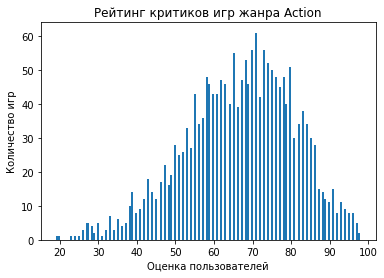

In [139]:
plt.hist(action_with_score['critic_score'], bins=150)
plt.title('Рейтинг критиков игр жанра Action')
plt.ylabel('Количество игр')
plt.xlabel('Оценка пользователей')
plt.show()

In [140]:
# проверим, адекватно ли отобразились данные
print(action_with_score['critic_score'].value_counts()) 

71.0    61
70.0    56
73.0    56
65.0    55
68.0    53
        ..
24.0     1
25.0     1
20.0     1
23.0     1
31.0     1
Name: critic_score, Length: 78, dtype: int64


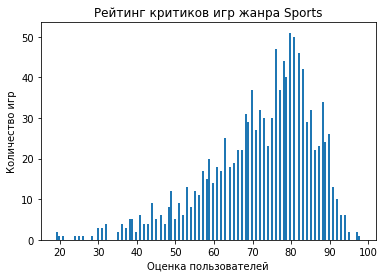

In [141]:
sports_with_score = games[(games['genre']=='Sports')]
plt.hist(sports_with_score['critic_score'], bins=150)
plt.title('Рейтинг критиков игр жанра Sports')
plt.ylabel('Количество игр')
plt.xlabel('Оценка пользователей')
plt.show()

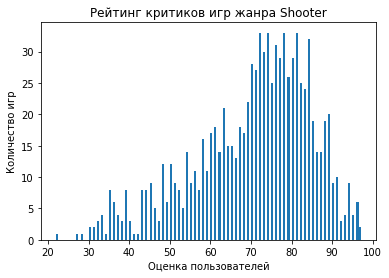

In [142]:
shooter_with_score = games[(games['genre']=='Shooter')]
plt.hist(shooter_with_score['critic_score'], bins=150)
plt.title('Рейтинг критиков игр жанра Shooter')
plt.ylabel('Количество игр')
plt.xlabel('Оценка пользователей')
plt.show()

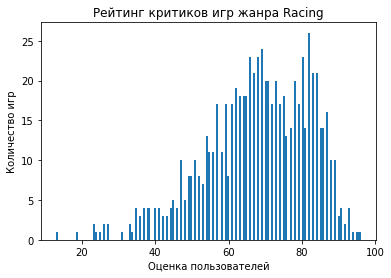

In [143]:
racing_with_score = games[(games['genre']=='Racing')]
plt.hist(racing_with_score['critic_score'], bins=150)
plt.title('Рейтинг критиков игр жанра Racing')
plt.ylabel('Количество игр')
plt.xlabel('Оценка пользователей')
plt.show()

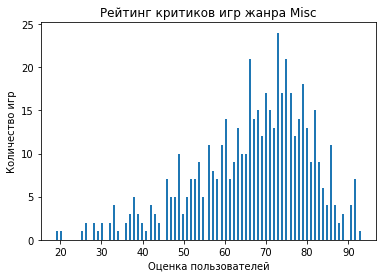

In [144]:
misc_with_score = games[(games['genre']=='Misc')]
plt.hist(misc_with_score['critic_score'], bins=150)
plt.title('Рейтинг критиков игр жанра Misc')
plt.ylabel('Количество игр')
plt.xlabel('Оценка пользователей')
plt.show()

In [145]:
# Cтатистические показатели оценки критиков отличаются больше. Наименьший рейтинг у жанров misc и action, выше всего критики оценивают sports.
# Меньше всего стандартное отклонение и дисперсия у жанра spotrs, значит в оценке этого жанра критики наиболее единодушны. Для жанра shooter же характерен
# максимальный разброс оценок.

In [146]:
# Проверим гипотезы
# Дано утверждение - средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Если это утверждение берется за нулевую гипотезу, 
# то противоположная ей ситуация - рейтинги разные, соответственно формулируем гипотезы: 
#Но: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 
# Н1: средние пользовательские рейтинги платформ Xbox One и PC разные.

In [147]:
# Посчитаем средний пользовательский рейтинг для платформ X360.

In [148]:
xbox = games[(games['platform']=='X360')]['user_score'].dropna()
print('Cредний пользовательский рейтинг для платформ X360', xbox.mean())

Cредний пользовательский рейтинг для платформ X360 6.683540372670808


In [149]:
# Посчитаем средний пользовательский рейтинг для платформ PC.

In [150]:
pc = games[(games['platform']== 'PC')]['user_score'].dropna()
print('Cредний пользовательский рейтинг для платформ PC', pc.mean())

Cредний пользовательский рейтинг для платформ PC 7.062467532467533


In [151]:
variance_estimate_xbox = np.var(xbox, ddof=1)
print('Дисперсия пользовательского рейтинга для платформ X360', variance_estimate_xbox)

Дисперсия пользовательского рейтинга для платформ X360 2.077438644482348


In [152]:
variance_estimate_pc = np.var(pc, ddof=1)
print('Дисперсия пользовательского рейтинга для платформ PC', variance_estimate_pc)

Дисперсия пользовательского рейтинга для платформ PC 2.3407871413372066


In [153]:
# Чтобы проверить гипотезу о равенстве среднего двух совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind. Дисперсии 
# совокупностей не равны, поэтому параметр equal_var указываем equal_var=False. Критический уровень статистической значимости примем за 0,01, 
# так как наша выборка достаточно объемна и следует понизить уровень значимости.

In [154]:
alpha = .01 
results = st.ttest_ind(xbox, pc, equal_var=False)
print('p-значение: ', results.pvalue)
if (results.pvalue  < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.6386403689482862e-07
Отвергаем нулевую гипотезу


In [155]:
# Полученное значение p-value говорит о том, что средние пользовательские рейтинги для разных платформ и неодинаковы и это различие нельзя считать 
# случайным с вероятность 0,1 %.

In [156]:
# Дано утверждение - средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные. 
# Если это утверждение берется за нулевую гипотезу, то противоположная ей ситуация - рейтинги одинаковые, соответственно формулируем гипотезы: 
# Но: средние пользовательские рейтинги жанров Action и Sports разные. 
# Н1: средние пользовательские рейтинги жанров Action и Sports одинаковые.

In [157]:
# Посчитаем средний пользовательский рейтинг для жанра Action.

In [158]:
genre_action = games[(games['genre']=='Action')]['user_score'].dropna()
genre_action.mean()                                         

7.054043715846995

In [159]:
# Посчитаем средний пользовательский рейтинг для жанра Sports.

In [160]:
genre_sports = games[(games['genre']=='Sports')]['user_score'].dropna()
genre_sports.mean() 

6.961196736174069

In [161]:
variance_estimate_action = np.var(genre_action, ddof=1)
print('Дисперсия пользовательского рейтинга для жанра Action', variance_estimate_action)

Дисперсия пользовательского рейтинга для жанра Action 2.031746898033205


In [162]:
variance_estimate_sports = np.var(genre_sports, ddof=1)
print('Дисперсия пользовательского рейтинга для жанра Sports', variance_estimate_sports)

Дисперсия пользовательского рейтинга для жанра Sports 2.5965147189730033


In [163]:
alpha = .01 
results = st.ttest_ind(genre_action, genre_sports, equal_var=False)
print('p-значение: ', results.pvalue)
if (results.pvalue  < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.11483818791498286
Не получилось отвергнуть нулевую гипотезу


In [164]:
# Полученное значение p-value говорит о том, что, хотя средние пользовательские рейтинги похожи, с вероятностью около 10% такое сходство случайно,
# и следует принимать, что пользователи по разному оценивают жанры action и sports.

In [165]:
# Общий вывод
# Массовое развитие игр началось примерно с 1994, а пик продаж пришелся на 2008-2009 год. Затем, из-за развития технологий и популярности мобильных игр 
# и приложений, уровень продаж начал снижаться.
#
# Самые популярные платформы - игровые приставки линейки PlayStation компании Sony( PlayStation, PlayStation 2 и PlayStation 3). Следующие по популярности -
# консоли от Nintendo DS и Wii, а также игровая приставка компании Microsoft Xbox 360.

# Для всех платформ наблюдается примерно одинаковая картина развития - время существования определенной модели 10-12 лет, на пике популярности 
# держится около 4 лет. Из популярных раньше платформ до 2016 продержались Wii, X360 и PS3.

# Самыми популярными в 2016 году стали игры для PS4 и XOne. Поэтому при составлении плана на следующий год следует ориентироваться на эти приставки. 
# Однако, работая на перспективу, возможно, следует поменять политику и частично перейти на игры для компьютеров и мобильных устройств.

# Отзывы пользователей очень незначительно влияют на решение других пользователей о покупке. Отзывы критиков у покупателей вызывают больше доверия 
# и значительнее влияют на решение совершить покупку. Поэтому, выбирая игры для последующих закупок магазина, следует опираться на сформулированные 
# критиками списки топ-игр.

# Выше всего критики оценивают sports, причем рейтинг критиков достаточно однороден.
# Самый продаваемый жанр - action, затем идут sport и shooter. Racing, misc, platform имеют примерно одинаковую популярность. Самые низкие продажи у игр 
# жанра strategy.

# Для региона Северной Америки и Европы наблюдается примерно одинаковая картина - самые популярные игры для таких платформ, как X360, PS2, Wii, PS3. 
# Самые популярные жанры - action, sports, shooter. Лучше всего продавались игры с рейтингом Е (Everyone, для всех), а также с рейтингом T 
# (Teen, Подросткам 13—19) и M(Mature, от 17 лет). Для Японии предпочтения пользователей отличаются от предпочтений в Америке и Европе. 
# Самые популярные игровые платформы - DS, PS, PS2, SNES, 3DS. Также среди популярных жанров, помимо action и sports, выделяется role-playing. 
# Соответственно, формировать политику компании можно в двух направлениях - объединенный сегмент Северной Америки и Европы и отдельно подбирать игры
# для азиатского сегмента с учетом региональных особенностей.

# В целом, влияние рейтинга на продажи в разных регионах примерно одинаковое. Можно предположить, что средний пользователь игр в Японии младше, 
# чем пользователь в Европе или Северной Америке.

# Пользователи по разному оценивают платформы Xbox One и PC, причем рейтинг у PC выше, что подтверждает уместность ориентироваться на игры для компьютеров.
# Также пользователи по разному оценивают жанры action и sports, жанр action пользуется большей популярностью.

# Таким образом, основное направление развития магазина - особое внимание играм жанра action и sports для приставки PS4, которые отмечают профессиональные
# критики, а также играм с рейтингами от 13 лет и старше.